Processing *wide* Image with Dimensions: (598, 1092)
Doing manual coordinate correction with .points file
Hypso Source
    uncorrectedHypsoLon uncorrectedHypsoLat
0            10.076605           59.801971
1             9.947275           59.661048
2             10.10658           59.526705
3            10.329505           59.756197
4            10.380956           59.959049
5             9.654835            60.01048
6            10.005274           60.607818
7            10.727707           60.802114
8            10.400754           60.904713
9            10.429935           60.964835
10           10.153709           61.127709
11           11.523019           62.191321
12           11.633964           62.255133
13           11.427097           62.254831
Hypso Destination
     transformed_mapLon  transformed_mapLat
0            10.366577           59.716311
1            10.241021           59.569467
2            10.386577           59.438368
3            10.595467           59.668931
4

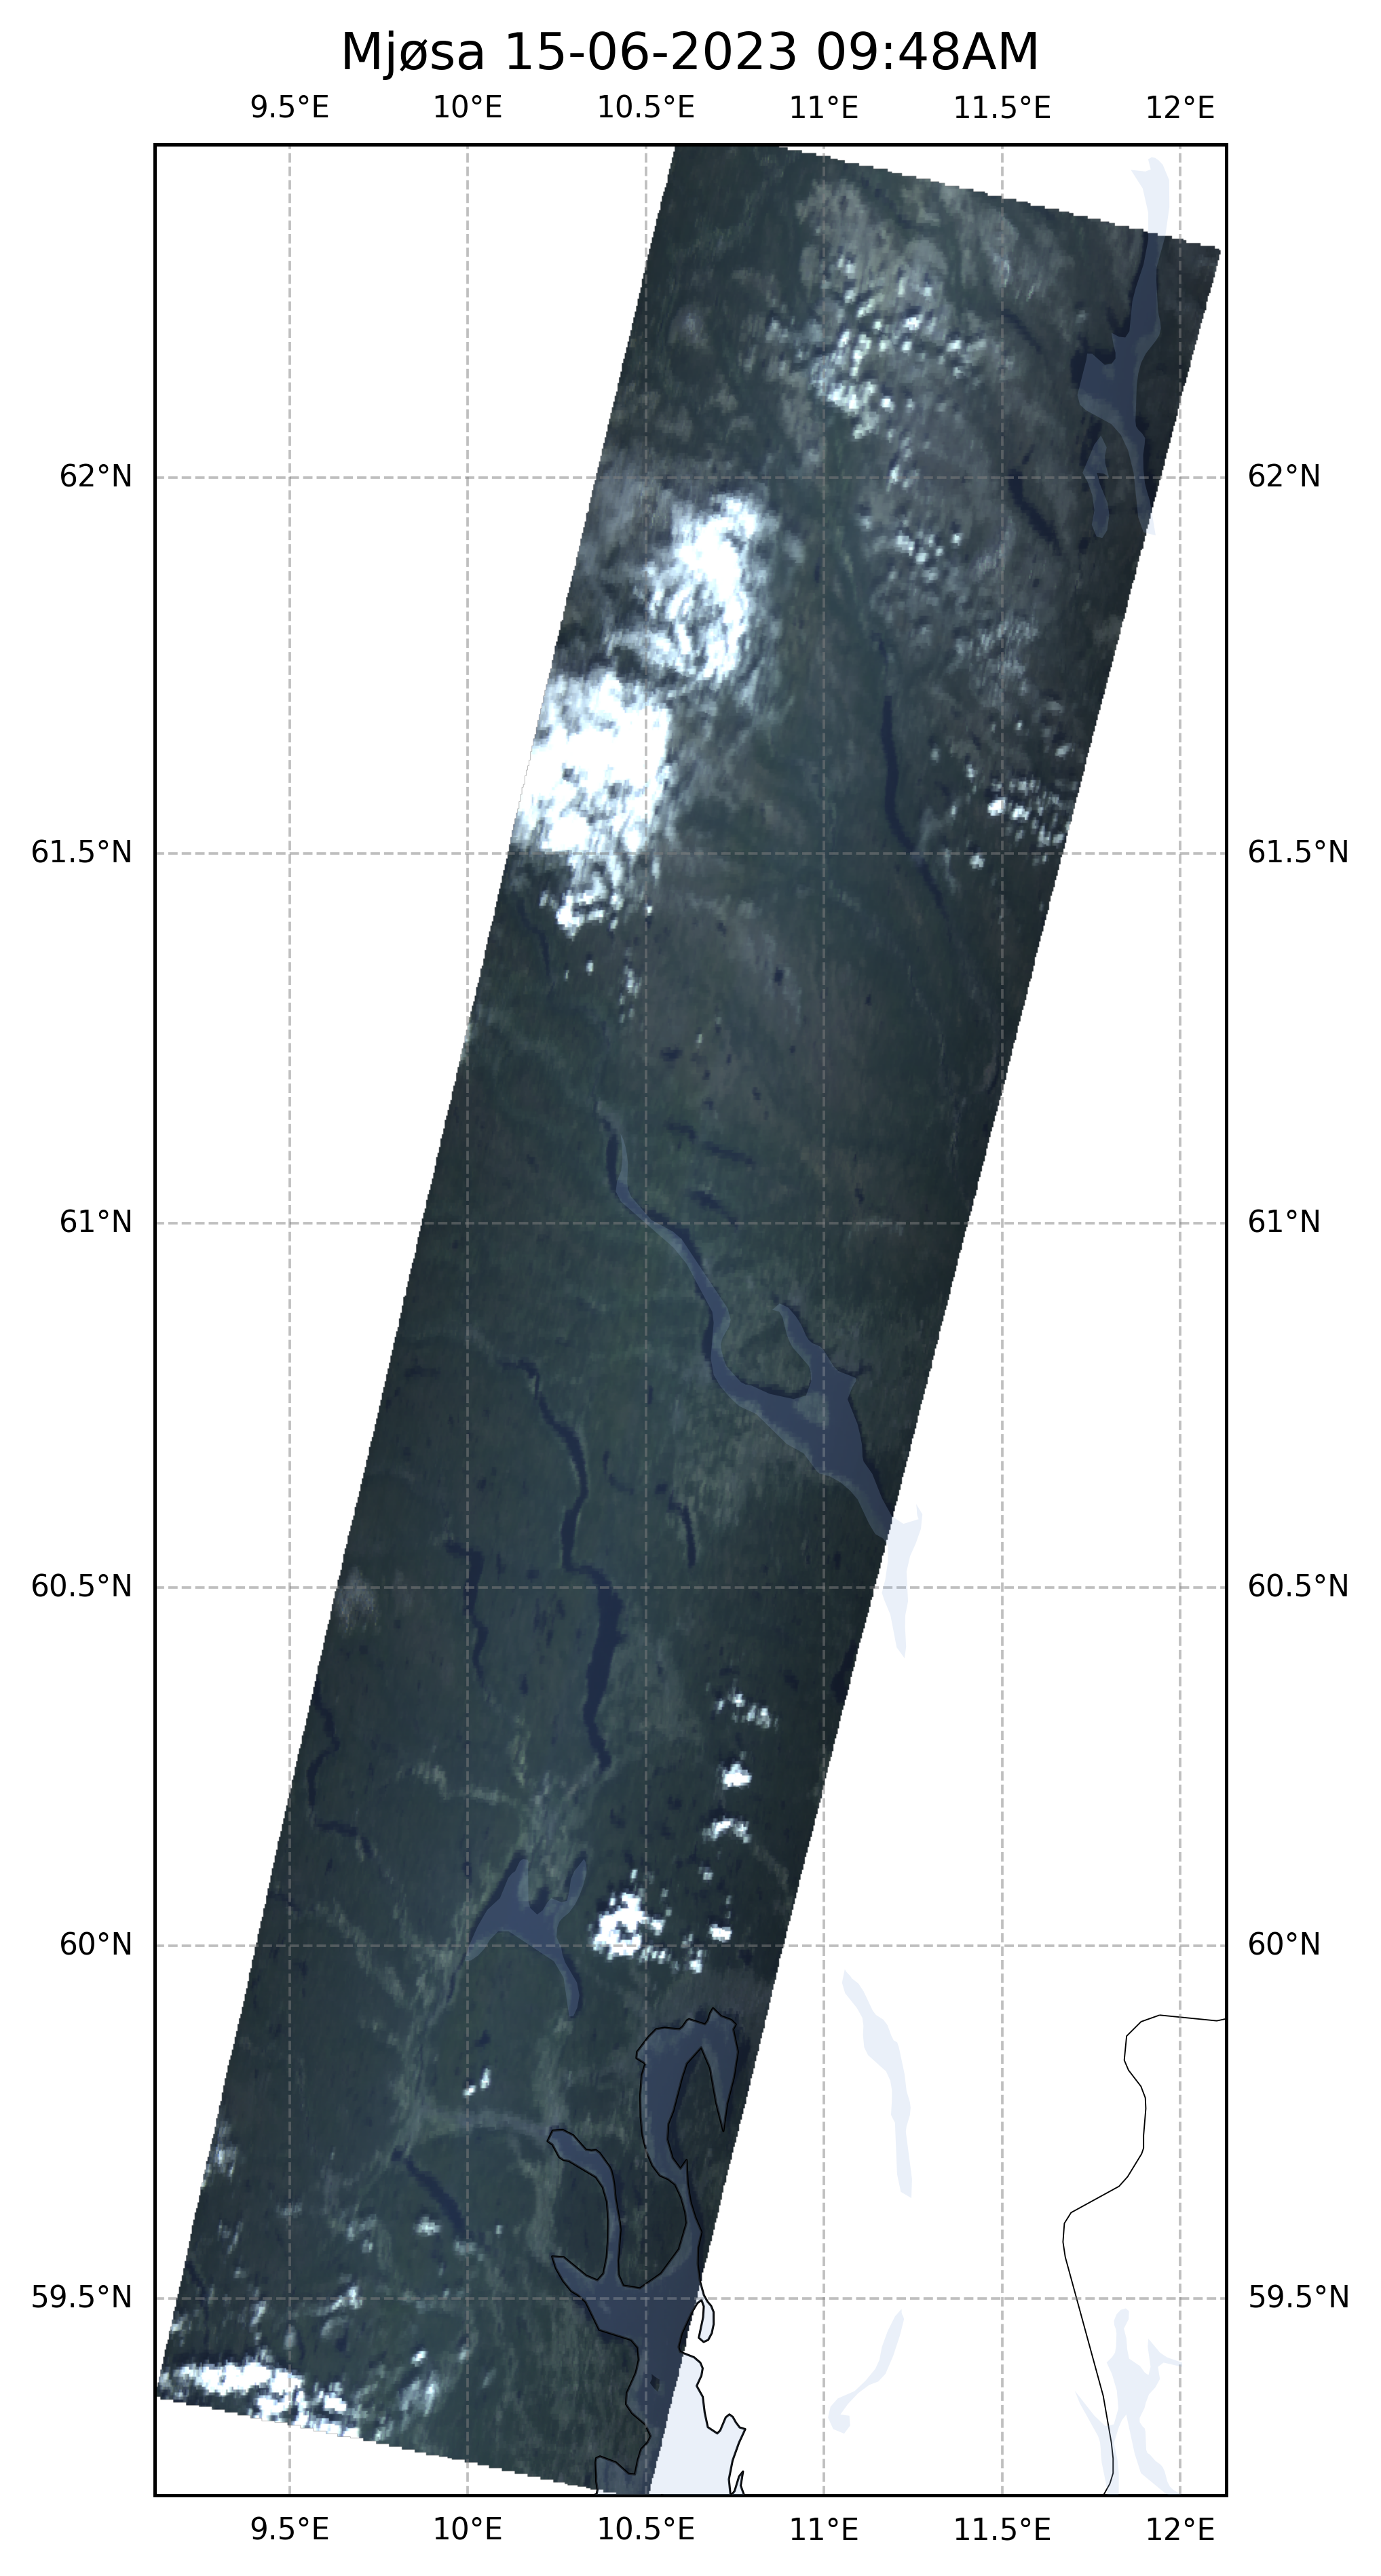

CPU times: user 25.3 s, sys: 1.64 s, total: 27 s
Wall time: 27.1 s


In [1]:
%%time
# Satellite Object
from hypso import Satellite

# Plot Fn
from hypso.plot import write_rgb_map, write_rgb, plot_chlorophyll

#
from hypso.georeference import generate_geotiff, array_to_geotiff
from hypso.spectra import print_this

from hypso.exportfiles import write_h1data_as_NetCDF4, print_nc

hypso_dir = r"/Users/alvaroflores/Documents/florida_2023-01-07_1524Z"
# hypso_dir = r"D:\4th Semester\Code\Datasets\Bundles\Bundle2\florida_2023-01-07_1524Z"
hypso_dir = r"/Users/alvaroflores/Documents/mjosa_2023-06-15_0948Z"
satobj = Satellite(hypso_dir)

write_rgb_map(satobj, plotTitle="Mjøsa 15-06-2023 09:48AM")


In [2]:
spectra1 = satobj.get_spectra([60.7776,11.0895],postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra1.csv") # Mjosa Sandvika
spectra1.head()

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (60.7776, 11.0895) -→ (864, 438)


,lat,lon,X,Y,wl387_85,wl391_4,wl394_96,wl398_51,wl402_07,wl405_62,...,wl771_76,wl775_18,wl778_6,wl782_02,wl785_44,wl788_86,wl792_28,wl795_69,wl799_11,wl802_52
0,60.7776,11.0895,864,438,0.0,0.0,0.0,327.395004,590.386537,587.678425,...,188.595806,193.023956,193.773106,196.441572,197.603349,195.626965,199.445941,212.211005,236.794984,261.454326


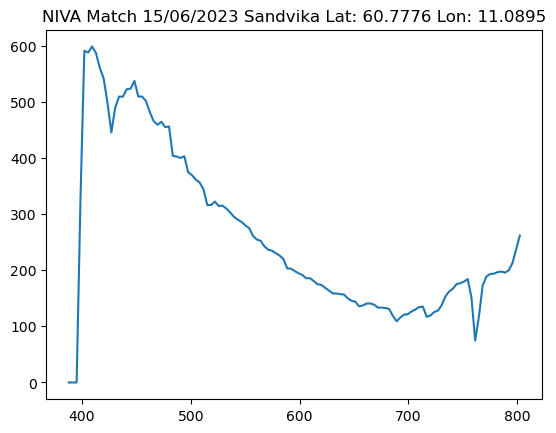

Min Lat:  59.218143
Max Lat:  62.437134
Min Lon:  9.122029
Max Lon:  12.129085


In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
val = np.array(spectra1)[0,4:]
plt.plot(satobj.wavelengths,val)
plt.title("NIVA Match 15/06/2023 Sandvika Lat: 60.7776 Lon: 11.0895")
plt.show()


print("Min Lat: ",np.nanmin(satobj.info["lat"]))
print("Max Lat: ",np.nanmax(satobj.info["lat"]))
print("Min Lon: ",np.nanmin(satobj.info["lon"]))
print("Max Lon: ",np.nanmax(satobj.info["lon"]))

In [4]:
spectra2 = satobj.get_spectra([60.6423, 11.1214],postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra2.csv") # Mjosa Skreia
spectra2.head()

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (60.6423, 11.1214) -→ (825, 400)


,lat,lon,X,Y,wl387_85,wl391_4,wl394_96,wl398_51,wl402_07,wl405_62,...,wl771_76,wl775_18,wl778_6,wl782_02,wl785_44,wl788_86,wl792_28,wl795_69,wl799_11,wl802_52
0,60.6423,11.1214,825,400,0.0,0.0,0.0,345.797972,565.903846,591.66806,...,106.342068,110.799746,110.15405,113.950598,114.072752,112.748176,117.899906,129.540208,153.794799,175.635511


In [5]:
spectra3 = satobj.get_spectra([60.7783,11.0891],postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra3.csv") # Mjosa Sandvika
spectra3.head()

Dataset CRS:  EPSG:32632
(lat, lon) -→ (X, Y) : (60.7783, 11.0891) -→ (865, 438)


,lat,lon,X,Y,wl387_85,wl391_4,wl394_96,wl398_51,wl402_07,wl405_62,...,wl771_76,wl775_18,wl778_6,wl782_02,wl785_44,wl788_86,wl792_28,wl795_69,wl799_11,wl802_52
0,60.7783,11.0891,865,438,0.0,0.0,0.0,330.463651,593.545755,593.749678,...,163.02122,164.858357,172.378457,170.195164,178.058812,181.208102,182.301632,191.624614,220.13824,239.374119


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#spectra = satobj.get_spectra([60.7776,11.0895],postype="coord") # Mjosa
#spectra = satobj.get_spectra([1081,582],postype="pix") # Mjosa
# spectra = satobj.get_spectra([26.1,l,],postype="coord") # Florida
spectra.head()

In [ ]:
write_h1data_as_NetCDF4(satobj, path_to_save=r"/Users/alvaroflores/Desktop/demo.nc")

In [ ]:
print_nc(r"/Users/alvaroflores/Desktop/demo.nc")

In [ ]:
rgb_img = write_rgb(satobj,path_to_save=r"/Users/alvaroflores/Desktop/image_demo.png")

In [ ]:
import numpy as np
chl_array = np.random.normal(1, 10, size=satobj.spatialDim)

plot_chlorophyll(satobj,chl_array)

In [ ]:
from hypso.classification import ndwi_watermask
ndwi_watermask(satobj)

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(satobj.waterMask)
#plt.savefig("watertest.png")

In [ ]:
array_to_geotiff(satobj, satobj.waterMask,)

In [ ]:
# Comparing Data Points
import numpy as np
spectra_test1 = satobj.get_spectra([60.7776,11.0895],postype="coord",filename=r"/Users/alvaroflores/Desktop/spectra1.csv") # Mjosa Sandvika
spectra_test1.head()

plt.figure()
val = np.array(spectra_test1)[0,3:]
plt.plot(val)
plt.title("NIVA Match 15/06/2023 Sandvika Lat: 60.7776 Lon: 11.0895")
plt.title("L1C Plot")
plt.show()

plt.figure()
plt.plot(satobj.l1b_cube[864,438,:])
plt.title("L1B Plot")
plt.show()
